# Lab - Drzewa

## Zadania

1. Wczytaj zbiór `Carseats.csv`. Usuń kolumnę `Sales` i zastąp ją zmienną kategoryczną `SalesHigh`, która przyjmie wartość `Yes`, jeśli `Sales >= 8` i `No` w przeciwnym przypadku. Użyj drzew decyzyjnych do predykcji wartości `SalesHigh` na podstawie pozostałych zmiennych.
    - Podziel dane na zbiór treningowy i testowy. Ze zbioru treningowego wydziel dodatkowo zbiór walidacyjny lub stosuj walidację krzyżową.
    - Stwórz model [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 
    - Zmniejsz rozmiar drzewa stosując 'przycinanie' (pruning). Wygeneruj wartości `ccp_alpha` metodą `cost_complexity_pruning_path()`. Użyj zbioru walidacyjnego lub walidacji krzyżowej (np. [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)) aby znaleźć najlepszą wartość. Zobacz, jak to zrobić w dokumentacji: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
    - Porównaj modele przed i po przycinaniu. Jak wpłynęło na jakość predykcji? Jak zmienił się rozmiar drzewa (sprawdź metodami `get_depth()`, `get_n_leaves()`)?
    - Sprawdź jaki wpływ na jakość predykcji ma regulowanie rozmiaru drzewa, np. parametrami `max_depth`, `max_leaf_nodes`.
    - Stwórz model [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) i porównaj go z wcześniej tworzonymi modelami.
    - Wybierz najlepsze ze stworzonych drzew decyzyjnych, biorąc pod uwagę zarówno jakość predykcji, jak i rozmiar drzewa. Wizualizuj drzewo metodą [`plot_tree()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html). Dokonaj ewaluacji korzystając ze zbioru testowego.
2. Zastosuj modele [`DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) i [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) do przewidywania wartości `medv` na podstawie pozostałych zmiennych w zbiorze `boston.csv`. Wykonaj kroki analogiczne do Zadania 1.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

## Zadanie 1

In [45]:
carseats = pd.read_csv('Carseats.csv')
carseats.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


In [46]:
carseats['SalesHigh'] = carseats['Sales'].map(lambda x: 1 if x >= 8 else 0)
carseats.drop(columns=['Sales'], inplace=True)

carseats['Urban'] = carseats['Urban'].map(lambda x: 1 if x == 'Yes' else 0)
carseats['US'] = carseats['US'].map(lambda x: 1 if x == 'Yes' else 0)
carseats['ShelveLoc'] = carseats['ShelveLoc'].map(lambda x: -1 if x == 'Bad' else (0 if x == 'Medium' else 1))

In [47]:
carseats.head(10)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,SalesHigh
0,138,73,11,276,120,-1,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,0,59,12,1,1,1
3,117,100,4,466,97,0,55,14,1,1,0
4,141,64,3,340,128,-1,38,13,1,0,0
5,124,113,13,501,72,-1,78,16,0,1,1
6,115,105,0,45,108,0,71,15,1,0,0
7,136,81,15,425,120,1,67,10,1,1,1
8,132,110,0,108,124,0,76,10,0,0,0
9,132,113,0,131,124,0,76,17,0,1,0


In [48]:
from sklearn.model_selection import train_test_split
X = carseats.drop(columns=['SalesHigh'])
y = carseats['SalesHigh']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=12)

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dtc_1 = DecisionTreeClassifier(random_state=38)
dtc_1.fit(X_train, y_train)
dtc_1.score(X_valid, y_valid)

0.7333333333333333

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

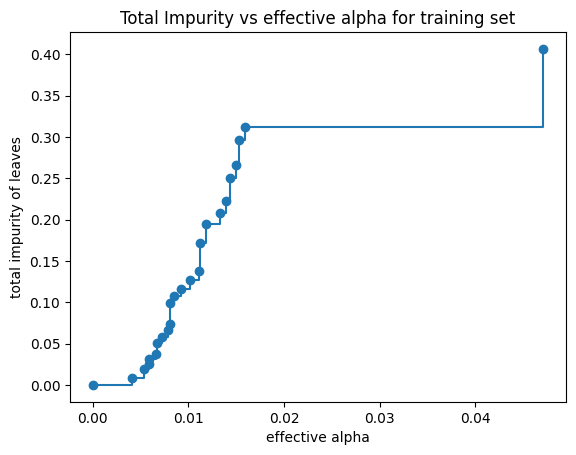

In [51]:
dtc_2 = DecisionTreeClassifier(random_state=42)
path = dtc_2.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [52]:
scores = []

for ccp_alpha in ccp_alphas:
    dtc = DecisionTreeClassifier(random_state=21, ccp_alpha=ccp_alpha)
    dtc.fit(X_train, y_train)
    train_score = dtc.score(X_train, y_train)
    valid_score = dtc.score(X_valid, y_valid)
    scores.append({
        "dtc": dtc,
        "ccp_alpha": ccp_alpha, 
        "train_score": train_score, 
        "valid_score": valid_score,
        "depth": dtc.get_depth(),
        "n_leaves": dtc.get_n_leaves(),
    })
    print(f"alpha: {ccp_alpha:.5f}, train score: {train_score:.5f}, valid score: {valid_score:.5f}, depth: {dtc.get_depth()}, n_leaves: {dtc.get_n_leaves()}")

alpha: 0.00000, train score: 1.00000, valid score: 0.70667, depth: 9, n_leaves: 36
alpha: 0.00415, train score: 0.99556, valid score: 0.69333, depth: 9, n_leaves: 34
alpha: 0.00533, train score: 0.98667, valid score: 0.72000, depth: 9, n_leaves: 32
alpha: 0.00593, train score: 0.97778, valid score: 0.70667, depth: 9, n_leaves: 30
alpha: 0.00593, train score: 0.97778, valid score: 0.70667, depth: 9, n_leaves: 30
alpha: 0.00667, train score: 0.97333, valid score: 0.70667, depth: 9, n_leaves: 29
alpha: 0.00673, train score: 0.96444, valid score: 0.70667, depth: 9, n_leaves: 27
alpha: 0.00726, train score: 0.96000, valid score: 0.70667, depth: 9, n_leaves: 26
alpha: 0.00790, train score: 0.95556, valid score: 0.70667, depth: 9, n_leaves: 25
alpha: 0.00808, train score: 0.95111, valid score: 0.70667, depth: 8, n_leaves: 24
alpha: 0.00810, train score: 0.93778, valid score: 0.70667, depth: 8, n_leaves: 21
alpha: 0.00852, train score: 0.93333, valid score: 0.73333, depth: 8, n_leaves: 20
alph

In [53]:
sorted(scores, key=lambda x: x['valid_score'], reverse=True)
scores[0]

{'dtc': DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=21),
 'ccp_alpha': np.float64(0.0),
 'train_score': 1.0,
 'valid_score': 0.7066666666666667,
 'depth': 9,
 'n_leaves': np.int64(36)}

In [54]:
dtc_1.get_depth(), dtc_1.get_n_leaves()

(9, np.int64(36))

In [55]:
scores[0]['dtc'].get_depth(), scores[0]['dtc'].get_n_leaves()

(9, np.int64(36))

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
parameters = [
    {
        "n_estimators": 1,
        "max_depth": 1,
        "max_features": 1,
        "min_samples_split": 2,
        "min_samples_leaf": 1,
    },
    {
        "n_estimators": 10,
        "max_depth": 5,
        "max_features": 3,
        "min_samples_split": 2,
        "min_samples_leaf": 1,
    },
    {
        "n_estimators": 100,
        "max_depth": None,
        "max_features": 'sqrt',
        "min_samples_split": 2,
        "min_samples_leaf": 1,
    },
]

In [59]:
for parametr in parameters:
    rfc = RandomForestClassifier(
        n_estimators=parametr['n_estimators'],
        max_depth=parametr['max_depth'],
        max_features=parametr['max_features'],
        min_samples_split=parametr['min_samples_split'],
        min_samples_leaf=parametr['min_samples_leaf'],
        random_state=42,
    )
    train = rfc.fit(X_train, y_train)
    valid = rfc.score(X_valid, y_valid)
    print(f"n_estimators: {parametr['n_estimators']}, max_depth: {parametr['max_depth']}, max_features: {parametr['max_features']}, min_samples_split: {parametr['min_samples_split']}, min_samples_leaf: {parametr['min_samples_leaf']}, valid score: {valid:.5f}")

n_estimators: 1, max_depth: 1, max_features: 1, min_samples_split: 2, min_samples_leaf: 1, valid score: 0.57333
n_estimators: 10, max_depth: 5, max_features: 3, min_samples_split: 2, min_samples_leaf: 1, valid score: 0.69333
n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1, valid score: 0.72000


In [60]:
from sklearn.tree import plot_tree

[Text(0.6103940217391305, 0.95, 'ShelveLoc <= 0.5\ngini = 0.485\nsamples = 225\nvalue = [132, 93]\nclass = Low'),
 Text(0.3294836956521739, 0.85, 'Price <= 94.5\ngini = 0.437\nsamples = 186\nvalue = [126.0, 60.0]\nclass = Low'),
 Text(0.4699388586956522, 0.8999999999999999, 'True  '),
 Text(0.07608695652173914, 0.75, 'Price <= 80.5\ngini = 0.42\nsamples = 30\nvalue = [9, 21]\nclass = High'),
 Text(0.05434782608695652, 0.65, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]\nclass = High'),
 Text(0.09782608695652174, 0.65, 'Urban <= 0.5\ngini = 0.495\nsamples = 20\nvalue = [9, 11]\nclass = High'),
 Text(0.043478260869565216, 0.55, 'Population <= 66.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = High'),
 Text(0.021739130434782608, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Low'),
 Text(0.06521739130434782, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = High'),
 Text(0.15217391304347827, 0.55, 'CompPrice <= 128.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]\nclass = L

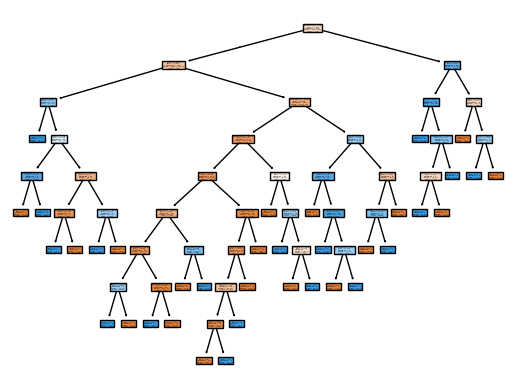

In [61]:
plot_tree(dtc_1, filled=True, feature_names=X.columns, class_names=['Low', 'High'])

[Text(0.6, 0.9, 'ShelveLoc <= 0.5\ngini = 0.485\nsamples = 225\nvalue = [132, 93]\nclass = Low'),
 Text(0.4, 0.7, 'Price <= 94.5\ngini = 0.437\nsamples = 186\nvalue = [126.0, 60.0]\nclass = Low'),
 Text(0.5, 0.8, 'True  '),
 Text(0.2, 0.5, 'gini = 0.42\nsamples = 30\nvalue = [9, 21]\nclass = High'),
 Text(0.6, 0.5, 'Advertising <= 13.5\ngini = 0.375\nsamples = 156\nvalue = [117, 39]\nclass = Low'),
 Text(0.4, 0.3, 'CompPrice <= 143.5\ngini = 0.279\nsamples = 131\nvalue = [109, 22]\nclass = Low'),
 Text(0.2, 0.1, 'gini = 0.215\nsamples = 114\nvalue = [100, 14]\nclass = Low'),
 Text(0.6, 0.1, 'gini = 0.498\nsamples = 17\nvalue = [9, 8]\nclass = Low'),
 Text(0.8, 0.3, 'gini = 0.435\nsamples = 25\nvalue = [8, 17]\nclass = High'),
 Text(0.8, 0.7, 'gini = 0.26\nsamples = 39\nvalue = [6, 33]\nclass = High'),
 Text(0.7, 0.8, '  False')]

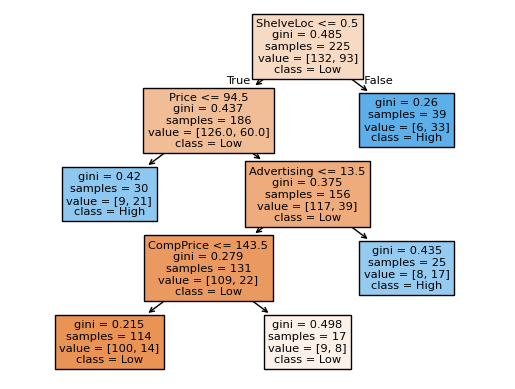

In [65]:
plot_tree(scores[-4]['dtc'], filled=True, feature_names=X.columns, class_names=['Low', 'High'])

## Zadanie 2

In [66]:
boston = pd.read_csv('Boston.csv')
boston.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [68]:
X = boston.drop(columns=['medv'])
y = boston['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=12)

In [69]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [70]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
dtr.score(X_valid, y_valid)

0.735043944635563

[Text(0.4218863224637681, 0.9705882352941176, 'lstat <= 7.93\nsquared_error = 83.055\nsamples = 284\nvalue = 22.041'),
 Text(0.19186292270531402, 0.9117647058823529, 'rm <= 7.435\nsquared_error = 83.782\nsamples = 90\nvalue = 31.133'),
 Text(0.30687462258454107, 0.9411764705882353, 'True  '),
 Text(0.126237922705314, 0.8529411764705882, 'dis <= 1.485\nsquared_error = 40.451\nsamples = 73\nvalue = 28.044'),
 Text(0.1223731884057971, 0.7941176470588235, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.13010265700483092, 0.7941176470588235, 'rm <= 6.803\nsquared_error = 20.639\nsamples = 70\nvalue = 27.103'),
 Text(0.0763888888888889, 0.7352941176470589, 'lstat <= 5.535\nsquared_error = 8.959\nsamples = 48\nvalue = 24.906'),
 Text(0.033816425120772944, 0.6764705882352942, 'lstat <= 4.52\nsquared_error = 8.558\nsamples = 15\nvalue = 27.88'),
 Text(0.015458937198067632, 0.6176470588235294, 'ptratio <= 17.2\nsquared_error = 1.286\nsamples = 5\nvalue = 30.78'),
 Text(0.0077294685990

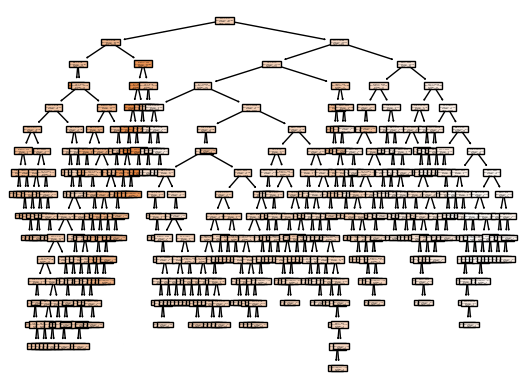

In [71]:
plot_tree(dtr, filled=True, feature_names=X.columns)

In [72]:
path = dtr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [73]:
scores = []

for ccp_alpha in ccp_alphas:
    dtr = DecisionTreeRegressor(random_state=21, ccp_alpha=ccp_alpha)
    dtr.fit(X_train, y_train)
    train_score = dtr.score(X_train, y_train)
    valid_score = dtr.score(X_valid, y_valid)
    scores.append({
        "dtr": dtr,
        "ccp_alpha": ccp_alpha, 
        "train_score": train_score, 
        "valid_score": valid_score,
        "depth": dtr.get_depth(),
        "n_leaves": dtr.get_n_leaves(),
    })
    print(f"alpha: {ccp_alpha:.5f}, train score: {train_score:.5f}, valid score: {valid_score:.5f}, depth: {dtr.get_depth()}, n_leaves: {dtr.get_n_leaves()}")

alpha: 0.00000, train score: 1.00000, valid score: 0.73061, depth: 16, n_leaves: 264
alpha: 0.00002, train score: 1.00000, valid score: 0.73061, depth: 16, n_leaves: 263
alpha: 0.00002, train score: 1.00000, valid score: 0.73061, depth: 16, n_leaves: 263
alpha: 0.00002, train score: 1.00000, valid score: 0.73061, depth: 16, n_leaves: 263
alpha: 0.00002, train score: 1.00000, valid score: 0.73053, depth: 16, n_leaves: 262
alpha: 0.00002, train score: 1.00000, valid score: 0.73053, depth: 16, n_leaves: 262
alpha: 0.00002, train score: 1.00000, valid score: 0.73053, depth: 16, n_leaves: 262
alpha: 0.00002, train score: 1.00000, valid score: 0.73050, depth: 16, n_leaves: 256
alpha: 0.00002, train score: 1.00000, valid score: 0.73050, depth: 16, n_leaves: 256
alpha: 0.00002, train score: 1.00000, valid score: 0.73050, depth: 16, n_leaves: 256
alpha: 0.00002, train score: 1.00000, valid score: 0.73050, depth: 16, n_leaves: 256
alpha: 0.00002, train score: 1.00000, valid score: 0.73050, depth

In [82]:
filtered_scores = list(filter(lambda x: x['valid_score'] < 0.7, scores))
filtered_scores[0]

{'dtr': DecisionTreeRegressor(ccp_alpha=np.float64(0.864186179649697), random_state=21),
 'ccp_alpha': np.float64(0.864186179649697),
 'train_score': 0.8706006213855357,
 'valid_score': 0.6942595008788597,
 'depth': 4,
 'n_leaves': np.int64(9)}

[Text(0.5, 0.9, 'lstat <= 7.93\nsquared_error = 83.055\nsamples = 284\nvalue = 22.041'),
 Text(0.3076923076923077, 0.7, 'rm <= 7.435\nsquared_error = 83.782\nsamples = 90\nvalue = 31.133'),
 Text(0.40384615384615385, 0.8, 'True  '),
 Text(0.15384615384615385, 0.5, 'dis <= 1.485\nsquared_error = 40.451\nsamples = 73\nvalue = 28.044'),
 Text(0.07692307692307693, 0.3, 'squared_error = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(0.23076923076923078, 0.3, 'rm <= 6.803\nsquared_error = 20.639\nsamples = 70\nvalue = 27.103'),
 Text(0.15384615384615385, 0.1, 'squared_error = 8.959\nsamples = 48\nvalue = 24.906'),
 Text(0.3076923076923077, 0.1, 'squared_error = 12.627\nsamples = 22\nvalue = 31.895'),
 Text(0.46153846153846156, 0.5, 'ptratio <= 18.3\nsquared_error = 52.859\nsamples = 17\nvalue = 44.4'),
 Text(0.38461538461538464, 0.3, 'squared_error = 16.048\nsamples = 15\nvalue = 46.513'),
 Text(0.5384615384615384, 0.3, 'squared_error = 44.223\nsamples = 2\nvalue = 28.55'),
 Text(0.6923076923076923

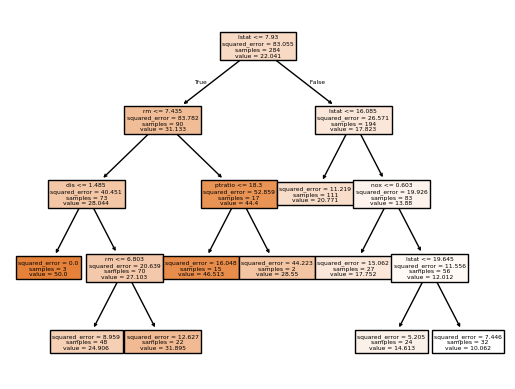

In [83]:
plot_tree(filtered_scores[0]["dtr"], filled=True, feature_names=X.columns)

In [ ]:
parameters = [
    {
        "n_estimators": 1,
        "max_depth": 1,
        "max_features": 1,
        "min_samples_split": 2,
        "min_samples_leaf": 1,
    },
    {
        "n_estimators": 10,
        "max_depth": 5,
        "max_features": 3,
        "min_samples_split": 2,
        "min_samples_leaf": 1,
    },
    {
        "n_estimators": 100,
        "max_depth": None,
        "max_features": 'sqrt',
        "min_samples_split": 2,
        "min_samples_leaf": 1,
    },
]

In [84]:
for parameter in parameters:
    rfr = RandomForestRegressor(
        n_estimators=parameter['n_estimators'],
        max_depth=parameter['max_depth'],
        max_features=parameter['max_features'],
        min_samples_split=parameter['min_samples_split'],
        min_samples_leaf=parameter['min_samples_leaf'],
        random_state=42,
    )
    train = rfr.fit(X_train, y_train)
    valid = rfr.score(X_valid, y_valid)
    print(f"n_estimators: {parameter['n_estimators']}, max_depth: {parameter['max_depth']}, max_features: {parameter['max_features']}, min_samples_split: {parameter['min_samples_split']}, min_samples_leaf: {parameter['min_samples_leaf']}, valid score: {valid:.5f}")

n_estimators: 1, max_depth: 1, max_features: 1, min_samples_split: 2, min_samples_leaf: 1, valid score: 0.44546
n_estimators: 10, max_depth: 5, max_features: 3, min_samples_split: 2, min_samples_leaf: 1, valid score: 0.71612
n_estimators: 100, max_depth: None, max_features: sqrt, min_samples_split: 2, min_samples_leaf: 1, valid score: 0.79478
